# Get traffic sign data

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs


Cloning into 'german-traffic-signs'...
Receiving objects: 100% (6/6), 117.80 MiB | 15.30 MiB/s, done.
Updating files: 100% (4/4), done.


# Import required module

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D



In [ ]:
import pickle
import pandas as pd
import random

In [ ]:
import cv2

In [ ]:
np.random.seed(0)

# Data Preprocessing

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(file=f)

with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(file=f)

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(file=f)

In [ ]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
x_train, y_train = train_data['features'], train_data['labels']
x_val, y_val = val_data['features'], val_data['labels']
x_test, y_test = test_data['features'], test_data['labels']


In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert x_train.shape[0] == y_train.shape[0]
assert x_val.shape[0] == y_val.shape[0]
assert x_test.shape[0] == y_test.shape[0]

In [ ]:
assert x_train.shape[1:] == (32,32,3)
assert x_val.shape[1:] == (32,32,3)
assert x_test.shape[1:] == (32,32,3)

In [ ]:
y_train == 1

array([False, False, False, ..., False, False, False])

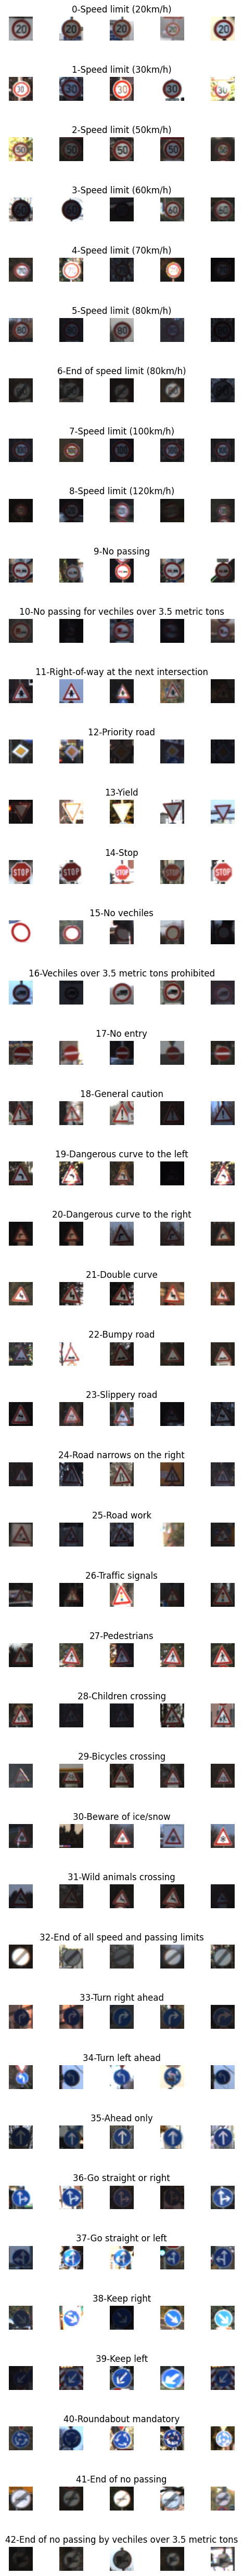

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = x_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row['SignName'])
            num_of_samples.append(len(x_selected))




[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

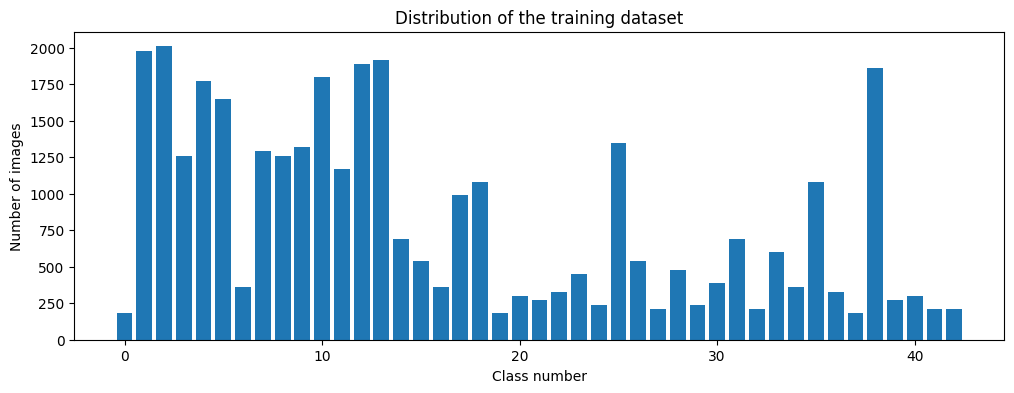

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

image shape:  (32, 32, 3)
Class image:  36


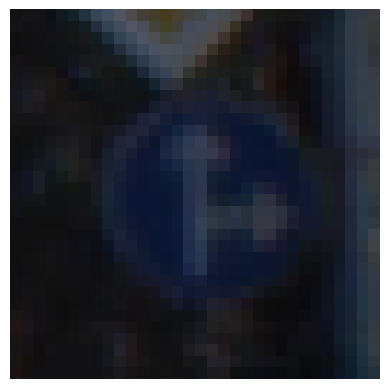

In [ ]:


plt.imshow(x_train[1000])
plt.axis('off')
print("image shape: ", x_train[1000].shape)
print("Class image: ", y_train[1000])

(32, 32)


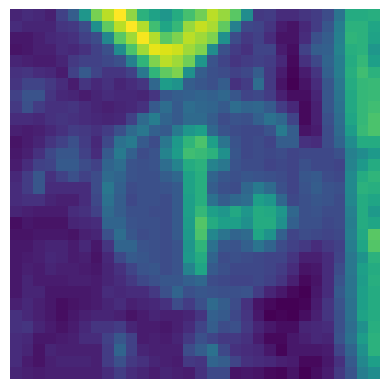

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(x_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


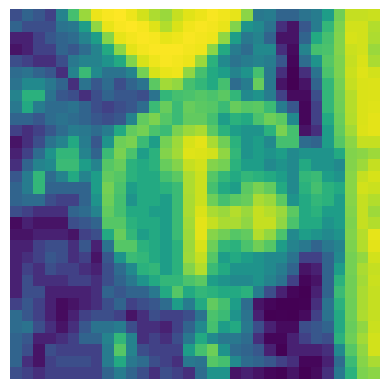

In [ ]:
def equalize(img):
  # Only accept grayscale image
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img / 255
  return img


x_train = np.array(list(map(preprocessing, x_train)))
x_val = np.array(list(map(preprocessing, x_val)))
x_test = np.array(list(map(preprocessing, x_test)))

(34799, 32, 32)


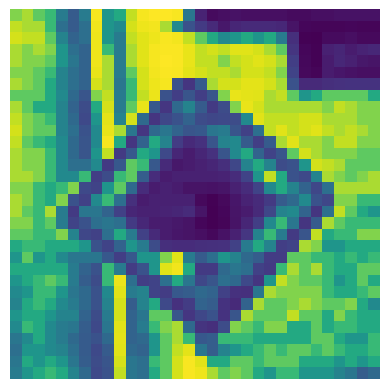

In [ ]:
plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
plt.axis('off')
print(x_train.shape)

In [ ]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_val = x_val.reshape(4410, 32, 32, 1)
x_test = x_test.reshape(12630, 32, 32, 1)

# Create Image Data Generator with Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                               zoom_range=0.2,
                               shear_range=0.1,
                               rotation_range=10)

datagen.fit(x_train)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


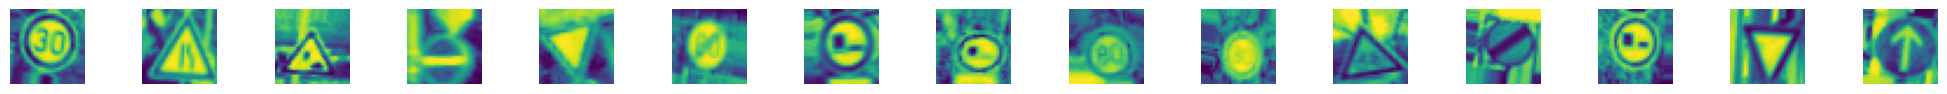

In [ ]:
batches = datagen.flow(x_train, y_train, batch_size=20)
x_batch, y_batch = next(batches)

fig, ax = plt.subplots(1, 15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  ax[i].imshow(x_batch[i].reshape(32,32))
  ax[i].axis('off')

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Model Creation

In [ ]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(64, (5,5), input_shape=(32,32,1), activation='relu'))
  model.add(Conv2D(64, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model = leNet_model()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,555 (1.59 MB)

 Trainable params: 416,555 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=50),
                              steps_per_epoch=2000, epochs=10, validation_data=(x_val, y_val), shuffle=1)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.4407 - loss: 2.0035 - val_accuracy: 0.9150 - val_loss: 0.3083
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8174 - loss: 0.5914 - val_accuracy: 0.9510 - val_loss: 0.1612
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8913 - loss: 0.3511 - val_accuracy: 0.9732 - val_loss: 0.0920
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9238 - loss: 0.2446 - val_accuracy: 0.9814 - val_loss: 0.0597
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9389 - loss: 0.1973 - val_accuracy: 0.9832 - val_loss: 0.0602
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9457 - loss: 0.1756 - val_accuracy: 0.9859 - val_loss: 0.0447
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9528 - loss: 0.1493 - val_accuracy: 0.9868 - val_loss: 0.0496
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9562 - loss: 0

# Model Evaluation

Text(0.5, 0, 'Epochs')

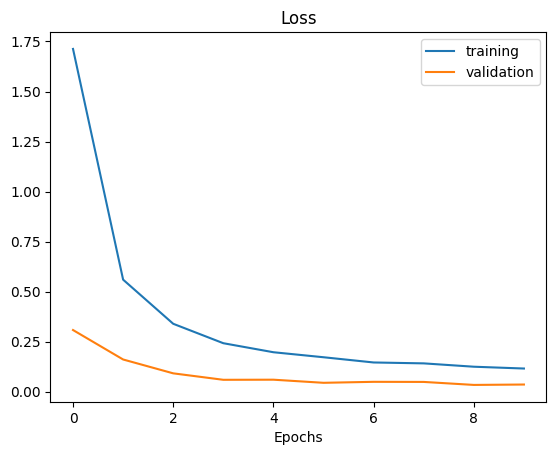

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

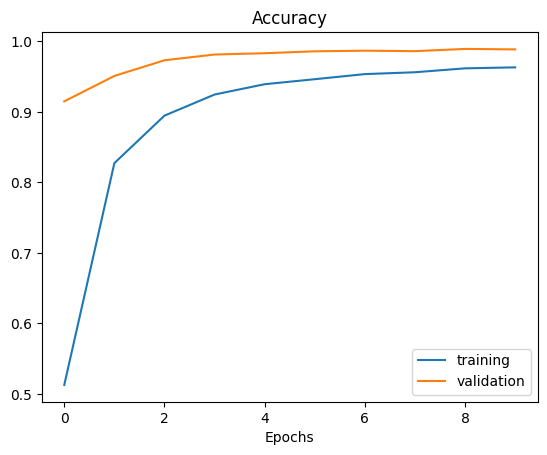

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Score :', score[0])
print('Test Accuracy :', score[1])

Test Score : 0.12101603299379349
Test Accuracy : 0.9698337316513062


In [ ]:
test_images = [
    'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg',
    'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg',
    'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg',
    'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg',
    'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
]

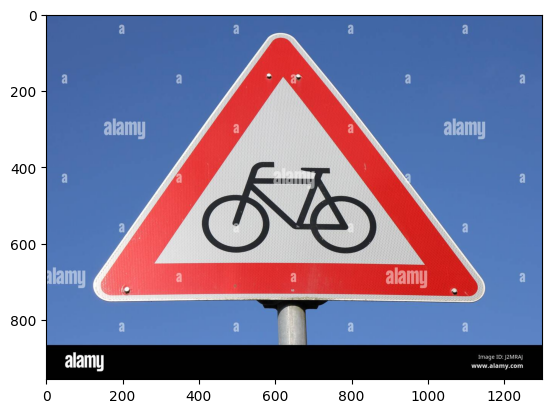

In [ ]:
#fetch image

import requests
from PIL import Image
url = test_images[0]
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



(32, 32)


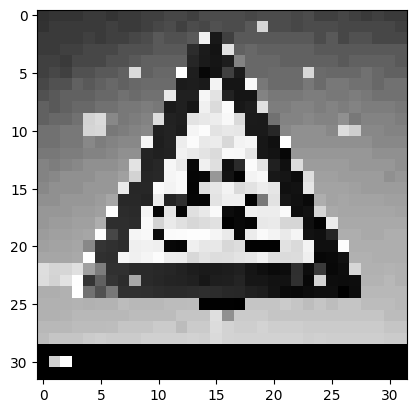

In [ ]:
#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
#Test image
pred = model.predict(img)
print("predicted sign: "+ str(np.argmax(pred,axis=1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
predicted sign: [30]
